In [1]:
import os
import sys
import torch
from copy import deepcopy
import matplotlib.pyplot as plt


sys.path.append(os.path.abspath('../'))
from Trainer import Trainer

/home/vateseifelfrej/anaconda3/envs/maddpg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vateseifelfrej/anaconda3/envs/maddpg/lib/python3.9/site-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


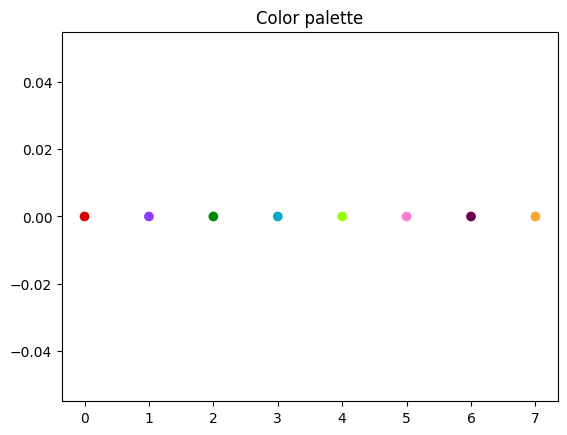

In [20]:
trainer = Trainer(num_landmarks=8, s_type='VQ', save_results=False)
trainer.plot_color_palette()

100%|██████████| 2000/2000 [00:17<00:00, 111.90it/s]


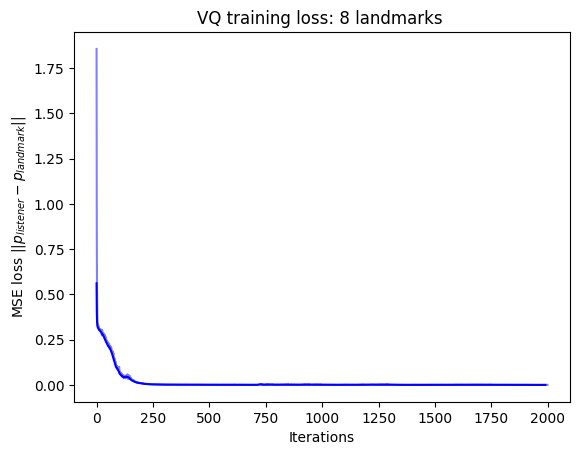

In [21]:
trainer.train(epochs=2000, show=True)

In [23]:
speaker, listener = trainer.export_models()

Nc = 3
dcolor = 1/Nc
c = torch.tensor([[0., 0., 0.]])
buffer = {i: [] for i in range(trainer.n_tokens)}
for i in range(Nc+1):
  c[0][1] = 0.
  for i in range(Nc+1):
    c[0][2] = 0.
    for i in range(Nc+1):

      _, msg_ix, _ = speaker(c)
      buffer[msg_ix.item()].append(deepcopy(c.squeeze().detach().numpy()))
      
      c += torch.tensor([[0., 0., dcolor]])
    
    c += torch.tensor([[0., dcolor, 0.]])

  c += torch.tensor([[dcolor, 0., 0.]])

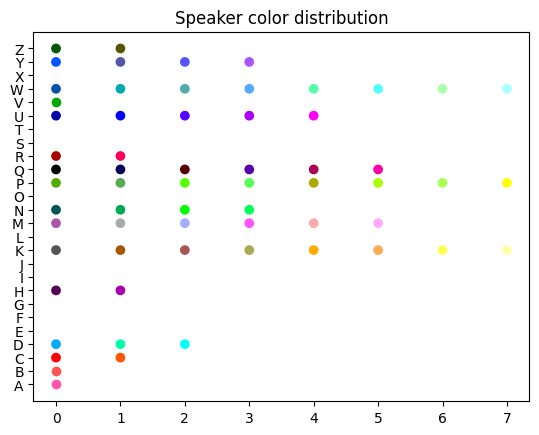

In [25]:
ctot = 0
for i, colors in enumerate(buffer.values()):
  ci = len(colors)
  ctot += ci
  plt.scatter(list(range(len(colors))), [i for _ in range(len(colors))], marker='o', c=colors)
  plt.title('Speaker color distribution')


ticks = [ch for ch in trainer.alphabet]
plt.yticks(list(range(0, trainer.n_tokens)), ticks)
pass